<a href="https://colab.research.google.com/github/kailash3113/Optical-Character-Recognition-Using-MLP/blob/main/Optical_Character_Recognition_Using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Required Modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 

import warnings
warnings.filterwarnings('ignore') 
sns.set()

In [ ]:
from keras.utils import np_utils

### Setting up kaggle Authentication 

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download sachinpatel21/az-handwritten-alphabets-in-csv-format

 99% 182M/185M [00:03<00:00, 66.8MB/s]
100% 185M/185M [00:03<00:00, 57.7MB/s]


In [ ]:
! unzip az-handwritten-alphabets-in-csv-format

Archive:  az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


### Loading the dataset

In [ ]:
dataset = pd.read_csv("/content/A_Z Handwritten Data.csv")
dataset.rename(columns={'0':'label'}, inplace=True)

# Splite data the X - Our data , and y - the prdict label
X = dataset.drop('label',axis = 1)
y = dataset['label']
print(X)
print(y)

        0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.639  0.640  \
0         0    0    0    0    0    0    0    0    0     0  ...      0      0   
1         0    0    0    0    0    0    0    0    0     0  ...      0      0   
2         0    0    0    0    0    0    0    0    0     0  ...      0      0   
3         0    0    0    0    0    0    0    0    0     0  ...      0      0   
4         0    0    0    0    0    0    0    0    0     0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
372445    0    0    0    0    0    0    0    0    0     0  ...      0      0   
372446    0    0    0    0    0    0    0    0    0     0  ...      0      0   
372447    0    0    0    0    0    0    0    0    0     0  ...      0      0   
372448    0    0    0    0    0    0    0    0    0     0  ...      0      0   
372449    0    0    0    0    0    0    0    0    0     0  ...      0      0   

        0.641  0.642  0.643  0.644  0.6

In [ ]:
print("shape:",X.shape)
print("column count:",len(X.iloc[1]))
print("784 = 28X28")

X.head()

shape: (372450, 784)
column count: 784
784 = 28X28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


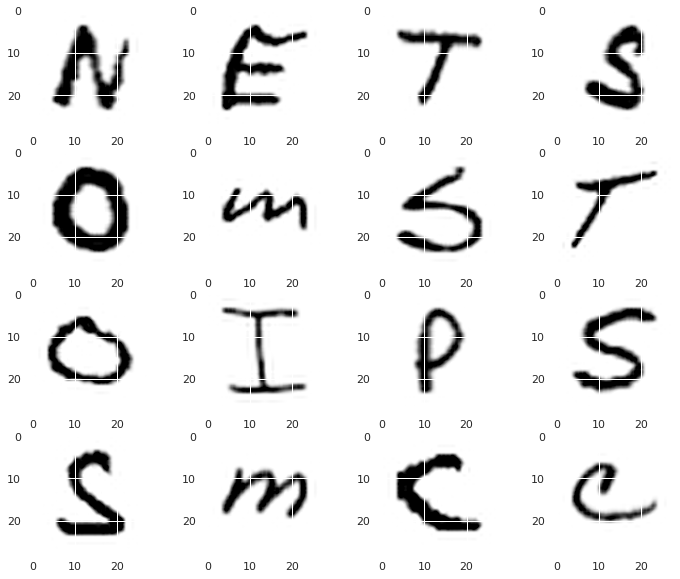

In [ ]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation="sinc", cmap='Greys')
plt.show()

In [ ]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


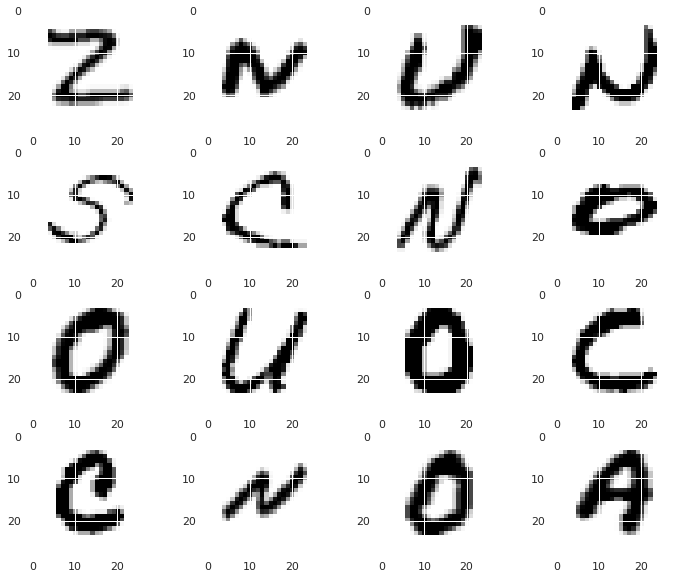

In [ ]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [ ]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

26
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0.]
18


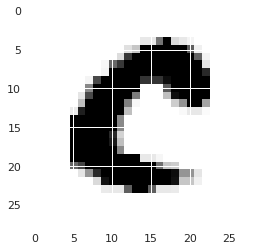

In [ ]:
print(len(y_test[0]))
print(y_test[7])

print(np.argmax(y_test[0]))
plt.imshow(X_train[7].reshape(28,28),cmap = 'Greys')

In [ ]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(y.unique()), activation='softmax'))
cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=200, verbose=2)
scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

1397/1397 - 150s - loss: 0.2339 - accuracy: 0.9345 - val_loss: 0.0941 - val_accuracy: 0.9746 - 150s/epoch - 108ms/step
CNN Score: 0.9746222496032715


In [ ]:
y_predict = cls.predict([X_test])

In [ ]:
print(np.argmax(y_predict[2]))

24


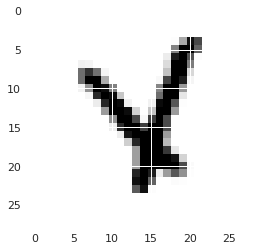

In [ ]:
plt.imshow(X_test[2].reshape(28,28),interpolation='nearest', cmap='Greys')